<h1> Machine Learning - 1 Assignment - 2 </h1>
<br>
<h2> Gaurang Ashava RA2111027010007 - AA1 </h2>

In [5]:
#Import the necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Gaurang
[nltk_data]     Ashava\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Gaurang
[nltk_data]     Ashava\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
!pip install WordCloud

                                              0.0/151.4 kB ? eta -:--:--
     ---------------                         61.4/151.4 kB 1.6 MB/s eta 0:00:01
     ---------------                         61.4/151.4 kB 1.6 MB/s eta 0:00:01
     ---------------                         61.4/151.4 kB 1.6 MB/s eta 0:00:01
     ---------------                         61.4/151.4 kB 1.6 MB/s eta 0:00:01
     ----------------------------------   143.4/151.4 kB 655.8 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 644.7 kB/s eta 0:00:00


In [14]:
data = pd.read_csv('C:/Users/Gaurang Ashava/Downloads/spam.csv',encoding="latin1")

In [17]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<h3>Preprocess the Data</h3>

In [18]:
data.drop_duplicates(inplace=True)
data.fillna("", inplace=True)
data['v2'] = data['v2'].str.lower()

In [19]:
#Function for removing special characters from the data
def clean_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [20]:
#Cleaning Data
data['v2'] = data['v2'].apply(clean_text)

In [21]:
#Removing Stopwords and Stemming
#Function for Removing Stopwords

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [22]:
#Removing Stopwords
data['v2'] = data['v2'].apply(remove_stopwords)

In [23]:
#Function for stemming the text in the data 
stemmer = PorterStemmer()

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

In [24]:
#Stemming the data
data['v2'] = data['v2'].apply(stem_text)

In [25]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go jurong point crazi avail bugi n great world...,,,
1,ham,ok lar joke wif u oni,,,
2,spam,free entri wkli comp win fa cup final tkt st m...,,,
3,ham,u dun say earli hor u c alreadi say,,,
4,ham,nah dont think goe usf live around though,,,


<h3>Apply label encoding for string attributes</h3>

In [26]:
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

In [27]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go jurong point crazi avail bugi n great world...,,,
1,0,ok lar joke wif u oni,,,
2,1,free entri wkli comp win fa cup final tkt st m...,,,
3,0,u dun say earli hor u c alreadi say,,,
4,0,nah dont think goe usf live around though,,,


<h3>Divide the training and test set</h3>

In [29]:
X = data['v2']
y = data['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Plot wordclouds for both ham and spam</h3>

In [30]:
ham_messages = data[data['v1'] == 0]['v2']
spam_messages = data[data['v1'] == 1]['v2']

# Creating a WordCloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))

# Creating a WordCloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))

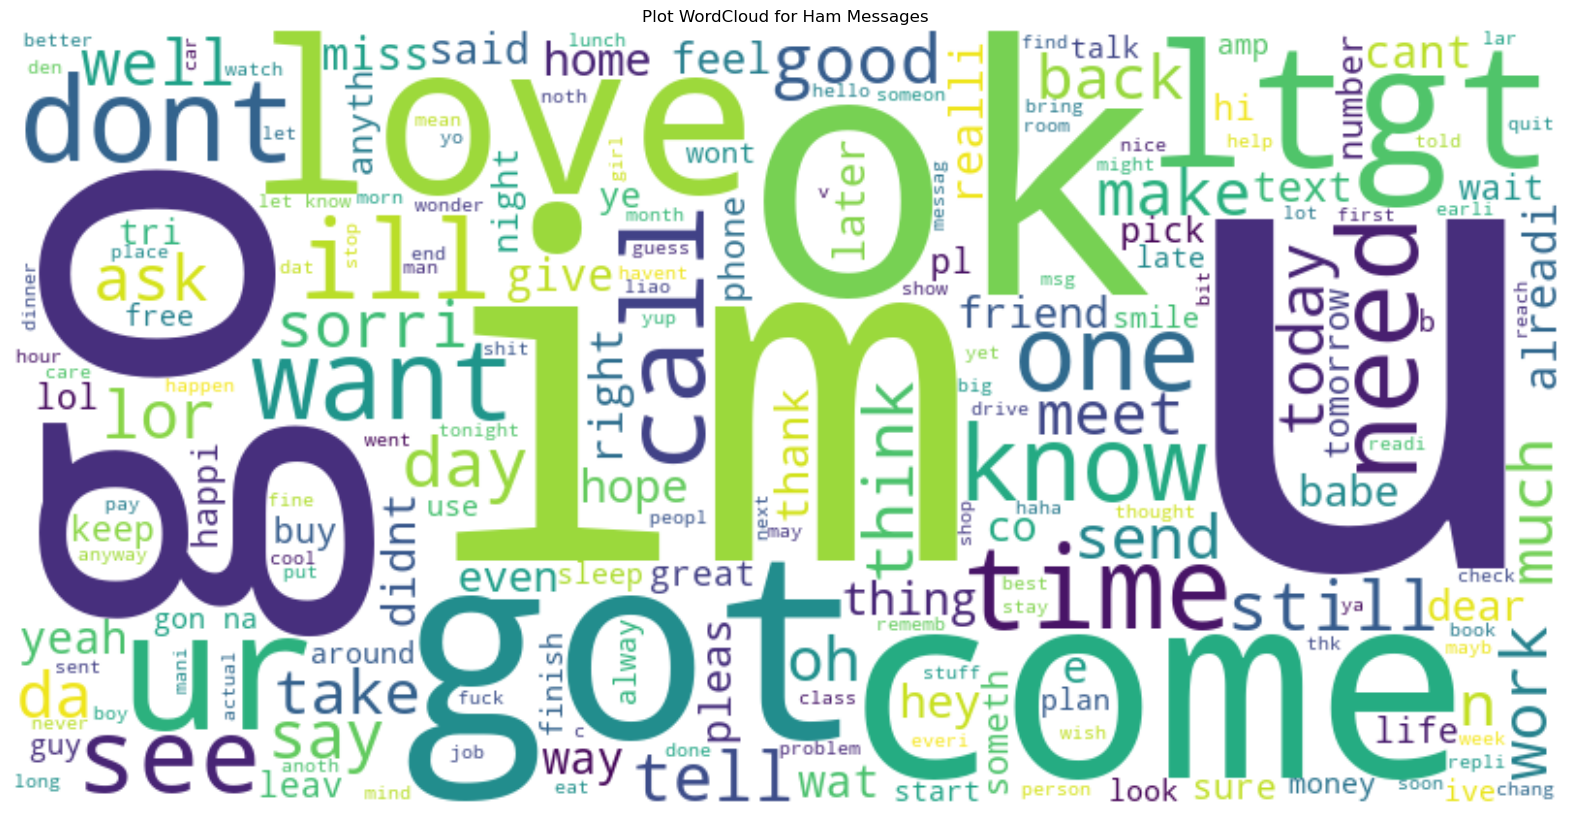

In [31]:
# Plotting the WordCloud for ham messages
plt.figure(figsize=(20, 15))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Plot WordCloud for Ham Messages')
plt.axis('off')
plt.show()

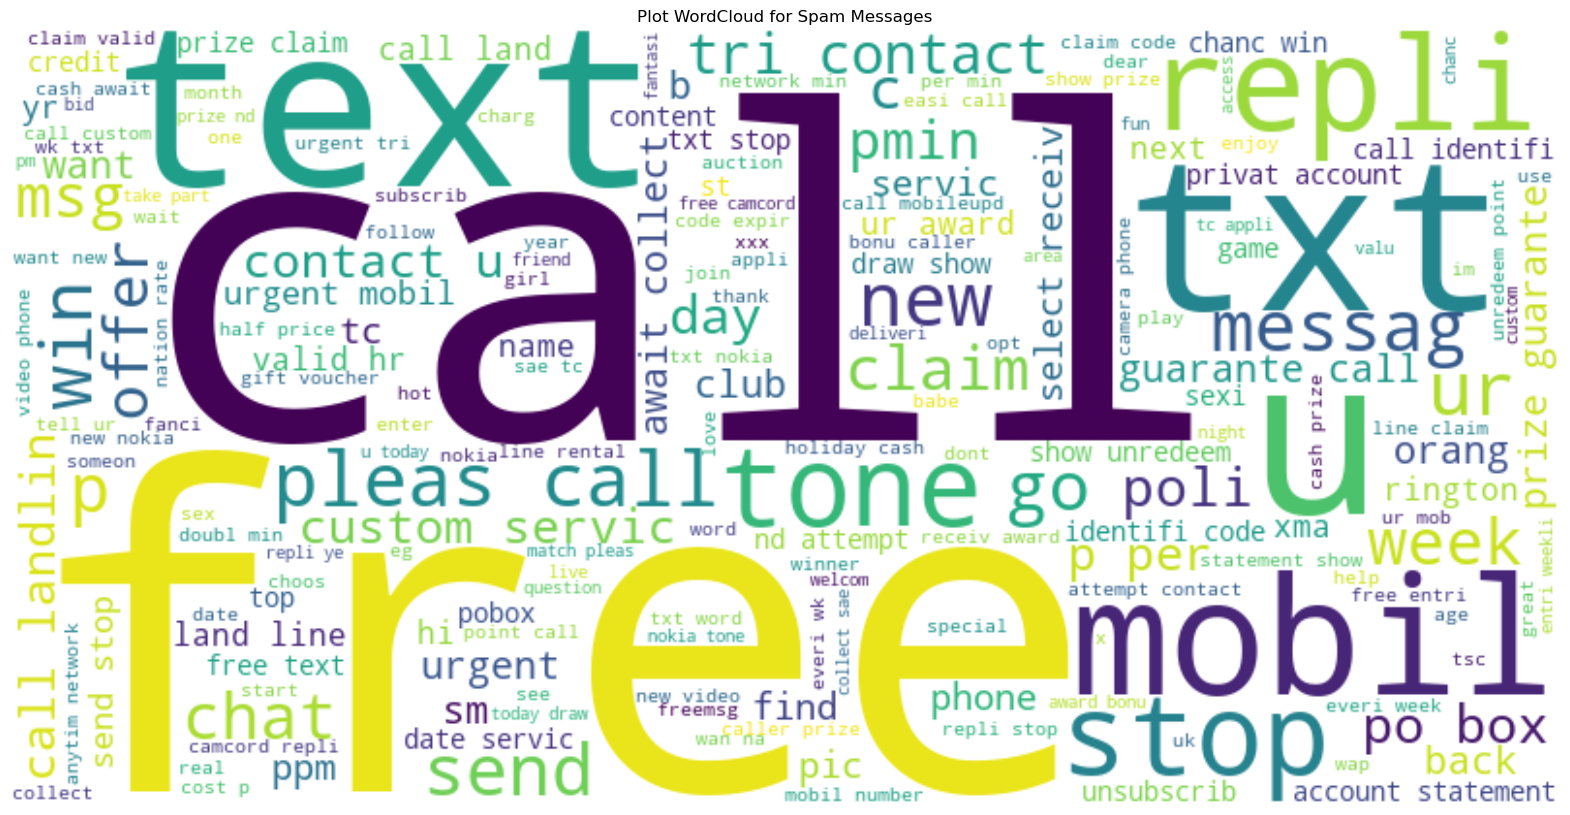

In [32]:
# Plotting the WordCloud for spam messages
plt.figure(figsize=(20, 15))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Plot WordCloud for Spam Messages')
plt.axis('off')
plt.show()

<h3>Calculate Term Frequency and Inverse document frequency</h3>


In [33]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

<h3>Calculate tf * idf</h3>

In [34]:
terms = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_train_tfidf.toarray()

for doc_index in range(5):
    print(f"Document {doc_index + 1}:")
    for term_index, term in enumerate(terms):
        print(f"{term}: {tfidf_values[doc_index][term_index]}")
    print("\n") 

Document 1:
aa: 0.0
aah: 0.0
aaniy: 0.0
aaooooright: 0.0
aathiwher: 0.0
ab: 0.0
abbey: 0.0
abdomen: 0.0
abeg: 0.0
abel: 0.0
aberdeen: 0.0
abi: 0.0
abil: 0.0
abiola: 0.0
abj: 0.0
abl: 0.0
abouta: 0.0
absenc: 0.0
absolut: 0.0
abstract: 0.0
abt: 0.0
abta: 0.0
aburo: 0.0
abus: 0.0
ac: 0.0
academ: 0.0
acc: 0.0
accent: 0.0
accentur: 0.0
accept: 0.0
access: 0.0
accid: 0.0
accident: 0.0
accommod: 0.0
accommodationvouch: 0.0
accomod: 0.0
accordingli: 0.0
account: 0.0
accumul: 0.0
ach: 0.0
achanammarakheshqatar: 0.0
achiev: 0.0
acid: 0.0
acknowledg: 0.0
aclpm: 0.0
acnt: 0.0
acoentri: 0.0
across: 0.0
acsmsreward: 0.0
act: 0.0
actin: 0.0
action: 0.0
activ: 0.0
actor: 0.0
actual: 0.0
acwicmbcktzr: 0.0
ad: 0.0
adam: 0.0
add: 0.0
addamsfa: 0.0
addi: 0.0
addict: 0.0
address: 0.0
addressul: 0.0
adewal: 0.0
adi: 0.0
adjust: 0.0
admin: 0.0
administr: 0.0
admir: 0.0
admiss: 0.0
admit: 0.0
ador: 0.0
adress: 0.0
adsens: 0.0
adult: 0.0
advanc: 0.0
adventur: 0.0
advic: 0.0
advis: 0.0
advisor: 0.0
ae: 0.0
aero

<h3>Apply logistic regression</h3>
    

In [35]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [36]:
y_pred = logistic_regression_model.predict(X_test_tfidf)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<h3>Compute Accuracy, Confusion matrix and F1 score</h3>

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [38]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[883   6]
 [ 39 106]]


In [39]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.82


<h3>Define the ham and spam features and define the spam messages in test</h3>

In [40]:
# Define ham and spam features
ham_features = X_test[y_test == 0]
spam_features = X_test[y_test == 1]

# Identify spam messages in the test set based on predictions
predicted_spam_indexes = [i for i, pred_label in enumerate(y_pred) if pred_label == 1]
actual_spam_indexes = [i for i, actual_label in enumerate(y_test) if actual_label == 1]

# Print indices of predicted and actual spam messages
print("\nIndices of Predicted Spam Messages:", predicted_spam_indexes)
print("Indices of Actual Spam Messages:", actual_spam_indexes)


Indices of Predicted Spam Messages: [5, 7, 24, 32, 35, 36, 37, 40, 55, 67, 68, 71, 76, 79, 89, 93, 94, 101, 108, 117, 123, 134, 137, 140, 153, 167, 183, 191, 194, 196, 213, 214, 225, 226, 227, 263, 271, 286, 300, 307, 311, 347, 397, 415, 438, 440, 448, 449, 458, 464, 468, 475, 476, 477, 483, 514, 516, 523, 537, 538, 547, 560, 562, 566, 582, 595, 601, 605, 625, 626, 627, 628, 638, 657, 662, 670, 678, 683, 698, 701, 710, 715, 734, 758, 771, 777, 787, 819, 831, 833, 845, 854, 877, 882, 885, 894, 902, 903, 915, 916, 927, 930, 964, 970, 975, 980, 981, 989, 991, 995, 1009, 1031]
Indices of Actual Spam Messages: [5, 7, 12, 20, 24, 32, 35, 36, 37, 40, 67, 68, 71, 76, 79, 89, 93, 94, 101, 108, 117, 120, 123, 134, 137, 140, 143, 153, 167, 169, 183, 191, 194, 196, 209, 213, 214, 225, 226, 227, 250, 257, 263, 271, 276, 286, 300, 311, 313, 335, 338, 347, 384, 397, 401, 404, 415, 437, 438, 440, 448, 449, 450, 458, 463, 464, 468, 475, 477, 483, 486, 494, 514, 516, 519, 523, 537, 538, 547, 549, 556, 